# Predicting the “Fraud in Auto Insurance Claims” and Pattern Extraction

A major general insurance company has a business problem with significant number of claims 
being reported are fraudulent in nature and it is leading to leakages. So, the Insurer decided to 
predict the fraudulent ones before even processing the claims to allocate costs appropriately, to 
keep the thorough investigation process in place and to design proper action plan for the claims etc.
The framework of prediction of fraud and pattern extraction wil be useful for the insurance companies, 
regulatory body, intelligence department etc.

Prediction at the time of processing claims will reduce costs and minimize losses for the insurance 
company. Hence, prediction of fraud plays very important role in auto insurance claims. The company 
wants to understand the hidden patterns in the data which lead to construction of investigation process as 
well as claim settlement decision. 

Beyond building a model to predict fraud will have to identify the patterns for fraud which will help 
in-turn to the company to take action accordingly to initiate the investigations on claim clases to identify 
if fraud exists and also to handle the fraudulent cases while settling the claims.

# Importing Libraries

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the Datasets

In [2]:
train_demo = pd.read_csv('Train_Demographics.csv',na_values=['NA'])
train_claim = pd.read_csv('Train_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])
train_policy = pd.read_csv('Train_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])
train_vehicle = pd.read_csv('train_Vehicle.csv',na_values=['???'])
train = pd.read_csv('Traindata_with_Target.csv')

In [3]:
test_demo = pd.read_csv('Test_Demographics.csv',na_values=['NA'])
test_claim = pd.read_csv('Test_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])
test_policy = pd.read_csv('Test_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])
test_vehicle = pd.read_csv('Test_Vehicle.csv',na_values=['???'])
test = pd.read_csv("Test.csv")

# Demographics_data

# Train data

In [4]:
train_demo

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [5]:
train_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [6]:
train_demo.dtypes

CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
Country                  object
dtype: object

In [7]:
# Checking the shape of the data
train_demo.shape

(28836, 10)

In [8]:
# Checking the null values
train_demo.isnull().sum()

CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

In [9]:
print(train_demo['InsuredGender'].value_counts())
print(train_demo['Country'].value_counts())

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64
India    28834
Name: Country, dtype: int64


In [10]:
train_demo[['InsuredGender','Country']] = train_demo[['InsuredGender','Country']].fillna(train_demo.mode().iloc[0])


In [11]:
train_demo.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

# Test data

In [12]:
test_demo

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India
...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India


In [13]:
test_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             8912 non-null   object
 1   InsuredAge             8912 non-null   int64 
 2   InsuredZipCode         8912 non-null   int64 
 3   InsuredGender          8904 non-null   object
 4   InsuredEducationLevel  8912 non-null   object
 5   InsuredOccupation      8912 non-null   object
 6   InsuredHobbies         8912 non-null   object
 7   CapitalGains           8912 non-null   int64 
 8   CapitalLoss            8912 non-null   int64 
 9   Country                8908 non-null   object
dtypes: int64(4), object(6)
memory usage: 696.4+ KB


In [14]:
# Checking the null values
test_demo.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            8
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  4
dtype: int64

In [15]:
test_demo[['InsuredGender','Country']] = test_demo[['InsuredGender','Country']].fillna(test_demo.mode().iloc[0])

In [16]:
# Checking the null values
test_demo.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

# Claim_data:

# Train data

In [17]:
train_claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,1,NO,0,3.0,NaN,6590.0,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,1,YES,0,2.0,YES,74547.0,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,1,YES,2,0.0,YES,55305.0,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,1,NaN,2,0.0,YES,55830.0,7059,7059,41712


In [18]:
train_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   DateOfIncident         28836 non-null  object 
 2   TypeOfIncident         28836 non-null  object 
 3   TypeOfCollission       23674 non-null  object 
 4   SeverityOfIncident     28836 non-null  object 
 5   AuthoritiesContacted   28836 non-null  object 
 6   IncidentState          28836 non-null  object 
 7   IncidentCity           28836 non-null  object 
 8   IncidentAddress        28836 non-null  object 
 9   IncidentTime           28805 non-null  float64
 10  NumberOfVehicles       28836 non-null  int64  
 11  PropertyDamage         18377 non-null  object 
 12  BodilyInjuries         28836 non-null  int64  
 13  Witnesses              28790 non-null  float64
 14  PoliceReport           19031 non-null  object 
 15  Am

In [19]:
train_claim.dtypes

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime             float64
NumberOfVehicles           int64
PropertyDamage            object
BodilyInjuries             int64
Witnesses                float64
PoliceReport              object
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
dtype: object

In [20]:
train_claim.shape

(28836, 19)

In [21]:
train_claim.isnull().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
dtype: int64

In [22]:
print(train_claim['TypeOfCollission'].value_counts())
print(train_claim['IncidentTime'].value_counts())
print(train_claim['PropertyDamage'].value_counts())
print(train_claim['Witnesses'].value_counts())
print(train_claim['PoliceReport'].value_counts())
print(train_claim['AmountOfTotalClaim'].value_counts())

Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64
16.0    1616
17.0    1615
6.0     1564
15.0    1541
14.0    1461
5.0     1434
13.0    1420
18.0    1419
4.0     1406
12.0    1363
7.0     1331
11.0    1286
19.0    1280
8.0     1251
3.0     1232
9.0     1210
10.0    1165
20.0    1153
21.0     971
22.0     809
2.0      713
1.0      648
23.0     526
0.0      391
Name: IncidentTime, dtype: int64
NO     9687
YES    8690
Name: PropertyDamage, dtype: int64
2.0    8449
1.0    8345
0.0    6128
3.0    5868
Name: Witnesses, dtype: int64
NO     9898
YES    9133
Name: PoliceReport, dtype: int64
6820.0     12
60600.0     8
5400.0      8
55000.0     7
5399.0      7
           ..
37863.0     1
33412.0     1
62879.0     1
54465.0     1
55830.0     1
Name: AmountOfTotalClaim, Length: 21975, dtype: int64


In [23]:
train_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']] = train_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']].fillna(train_claim.mode().iloc[0])


In [24]:
train_claim['Witnesses'].fillna(train_claim['Witnesses'].mean(), inplace=True)


In [25]:
train_claim[['AmountOfTotalClaim', 'IncidentTime']] = train_claim[['AmountOfTotalClaim', 'IncidentTime']].fillna(train_claim.median())


In [26]:
train_claim.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

# Test data

In [27]:
test_claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10.0,1,YES,1,0.0,NO,61296.0,5785,8861,46650
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19.0,1,NaN,1,1.0,YES,86729.0,9698,9698,67333
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9.0,1,YES,1,2.0,NO,65328.0,12455,9281,43592
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19.0,1,YES,0,2.0,YES,71118.0,11977,11604,47537


In [28]:
test_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             8912 non-null   object 
 1   DateOfIncident         8912 non-null   object 
 2   TypeOfIncident         8912 non-null   object 
 3   TypeOfCollission       7149 non-null   object 
 4   SeverityOfIncident     8912 non-null   object 
 5   AuthoritiesContacted   8912 non-null   object 
 6   IncidentState          8912 non-null   object 
 7   IncidentCity           8912 non-null   object 
 8   IncidentAddress        8912 non-null   object 
 9   IncidentTime           8905 non-null   float64
 10  NumberOfVehicles       8912 non-null   int64  
 11  PropertyDamage         5713 non-null   object 
 12  BodilyInjuries         8912 non-null   int64  
 13  Witnesses              8900 non-null   float64
 14  PoliceReport           5898 non-null   object 
 15  Amou

In [29]:
test_claim.isnull().sum()

CustomerID                  0
DateOfIncident              0
TypeOfIncident              0
TypeOfCollission         1763
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64

In [30]:
test_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']] = test_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']].fillna(test_claim.mode().iloc[0])

In [31]:
test_claim['Witnesses'].fillna(test_claim['Witnesses'].mean(), inplace=True)

In [32]:
test_claim[['AmountOfTotalClaim', 'IncidentTime']] = test_claim[['AmountOfTotalClaim', 'IncidentTime']].fillna(test_claim.median())


In [33]:
test_claim.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

# Policy_data:

# Train data

In [34]:
train_policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [35]:
train_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28695 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [36]:
train_policy.dtypes

InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
CustomerID                     object
dtype: object

In [37]:
train_policy.shape

(28836, 10)

In [38]:
train_policy.isnull().sum()

InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           141
UmbrellaLimit                   0
InsuredRelationship             0
CustomerID                      0
dtype: int64

In [39]:
print(train_policy['PolicyAnnualPremium'].value_counts())

1310.77    7
1310.78    6
1226.29    5
1285.77    5
1265.59    5
          ..
1131.23    1
1446.95    1
1184.71    1
1052.28    1
1062.91    1
Name: PolicyAnnualPremium, Length: 23851, dtype: int64


In [40]:
train_policy['PolicyAnnualPremium'].fillna(train_policy['PolicyAnnualPremium'].mean(), inplace=True)

In [41]:
train_policy.isnull().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

# Test data

In [42]:
test_policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020
...,...,...,...,...,...,...,...,...,...,...
8907,148598,155,2000-03-19,State3,250/500,616,1358.80,3462442,other-relative,Cust39477
8908,148599,215,1993-07-23,State3,250/500,892,1299.82,4567362,other-relative,Cust39478
8909,148609,245,2009-12-11,State1,500/1000,1002,1361.44,9580,wife,Cust39488
8910,148610,437,2011-11-17,State1,500/1000,1902,1357.36,4510498,wife,Cust39489


In [43]:
test_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       8912 non-null   int64  
 1   CustomerLoyaltyPeriod       8912 non-null   int64  
 2   DateOfPolicyCoverage        8912 non-null   object 
 3   InsurancePolicyState        8912 non-null   object 
 4   Policy_CombinedSingleLimit  8912 non-null   object 
 5   Policy_Deductible           8912 non-null   int64  
 6   PolicyAnnualPremium         8865 non-null   float64
 7   UmbrellaLimit               8912 non-null   int64  
 8   InsuredRelationship         8912 non-null   object 
 9   CustomerID                  8912 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 696.4+ KB


In [44]:
test_policy.isnull().sum()

InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPolicyCoverage           0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           47
UmbrellaLimit                  0
InsuredRelationship            0
CustomerID                     0
dtype: int64

In [45]:
test_policy['PolicyAnnualPremium'].fillna(test_policy['PolicyAnnualPremium'].mean(), inplace=True)

In [46]:
test_policy.isnull().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

# Vehicle_data

# Train data

In [47]:
train_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [48]:
train_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115344 entries, 0 to 115343
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CustomerID               115344 non-null  object
 1   VehicleAttribute         115344 non-null  object
 2   VehicleAttributeDetails  115294 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [49]:
train_vehicle = train_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [50]:
train_vehicle.shape

(28836, 4)

In [51]:
train_vehicle.columns = train_vehicle.columns.droplevel(0) 
train_vehicle.columns.name = None               
train_vehicle = train_vehicle.reset_index()

In [52]:
train_vehicle

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...
28831,Cust9993,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,Vehicle10240,Suburu,Forrestor,2004


In [53]:
train_vehicle.dtypes

CustomerID      object
VehicleID       object
VehicleMake     object
VehicleModel    object
VehicleYOM      object
dtype: object

In [54]:
train_vehicle.isnull().sum()

CustomerID       0
VehicleID        0
VehicleMake     50
VehicleModel     0
VehicleYOM       0
dtype: int64

In [55]:
train_vehicle[['VehicleMake']] = train_vehicle[['VehicleMake']].fillna(train_vehicle.mode().iloc[0])

In [56]:
train_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64

# Test data

In [57]:
test_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry
...,...,...,...
35643,Cust1980,VehicleModel,95
35644,Cust17773,VehicleModel,Silverado
35645,Cust24313,VehicleID,Vehicle33407
35646,Cust5061,VehicleYOM,2003


In [58]:
test_vehicle = test_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [59]:
test_vehicle.columns = test_vehicle.columns.droplevel(0) 
test_vehicle.columns.name = None               
test_vehicle = test_vehicle.reset_index()

In [60]:
test_vehicle

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,Vehicle37114,Accura,TL,2009
4,Cust1003,Vehicle16771,Dodge,RAM,2007
...,...,...,...,...,...
8907,Cust9984,Vehicle19062,Saab,95,2000
8908,Cust9986,Vehicle18191,Saab,92x,2000
8909,Cust9990,Vehicle11032,BMW,Civic,1998
8910,Cust9995,Vehicle30412,Jeep,Grand Cherokee,2002


In [61]:
test_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     8
VehicleModel    0
VehicleYOM      0
dtype: int64

In [62]:
test_vehicle[['VehicleMake']] = test_vehicle[['VehicleMake']].fillna(test_vehicle.mode().iloc[0])

In [63]:
test_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64

# Train data

In [64]:
train

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


In [66]:
train.dtypes

CustomerID       object
ReportedFraud    object
dtype: object

In [67]:
train.isnull().sum()

CustomerID       0
ReportedFraud    0
dtype: int64

# Test data

In [68]:
test

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003
...,...
8907,Cust37942
8908,Cust20528
8909,Cust36797
8910,Cust28499


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  8912 non-null   object
dtypes: object(1)
memory usage: 69.8+ KB


In [70]:
test.isnull().sum()

CustomerID    0
dtype: int64

# Merging the data

# Train data

In [71]:
train_df = pd.merge(train_demo, train_claim, on='CustomerID')
train_df = pd.merge(train_df, train_policy, on='CustomerID')
train_df = pd.merge(train_df, train_vehicle, on='CustomerID')
train_df = pd.merge(train_df, train, on='CustomerID')

In [72]:
# Save the dataframe as a new CSV file
train_df.to_csv('train_data.csv', index=False)

In [73]:
train_df = pd.read_csv('train_data.csv')

In [74]:
train_df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [75]:
train_df.tail()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007,N
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N
28835,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,...,500/1000,2000,928.43,2909175,husband,Vehicle39163,Suburu,E400,2007,N


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   InsuredAge                  28836 non-null  int64  
 2   InsuredZipCode              28836 non-null  int64  
 3   InsuredGender               28836 non-null  object 
 4   InsuredEducationLevel       28836 non-null  object 
 5   InsuredOccupation           28836 non-null  object 
 6   InsuredHobbies              28836 non-null  object 
 7   CapitalGains                28836 non-null  int64  
 8   CapitalLoss                 28836 non-null  int64  
 9   Country                     28836 non-null  object 
 10  DateOfIncident              28836 non-null  object 
 11  TypeOfIncident              28836 non-null  object 
 12  TypeOfCollission            28836 non-null  object 
 13  SeverityOfIncident          288

In [77]:
train_df.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfProp

In [78]:
train_df.shape

(28836, 42)

In [79]:
train_df.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

In [80]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,28836.0,38.815370,7.996377e+00,19.00,33.0000,38.000,44.000,64.00
InsuredZipCode,28836.0,502436.579068,7.225087e+04,430104.00,448603.0000,466691.000,603848.000,620962.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.00,0.0000,0.000,49000.000,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.00,-50000.0000,0.000,0.000,0.00
IncidentTime,28836.0,11.764322,6.145568e+00,0.00,6.0000,12.000,17.000,23.00
NumberOfVehicles,28836.0,1.823207,9.800987e-01,1.00,1.0000,1.000,3.000,4.00
BodilyInjuries,28836.0,0.985782,7.847641e-01,0.00,0.0000,1.000,2.000,2.00
Witnesses,28836.0,1.488260,1.039960e+00,0.00,1.0000,1.000,2.000,3.00
AmountOfTotalClaim,28836.0,52319.038355,2.508066e+04,150.00,44686.2500,58360.000,68961.750,114920.00
AmountOfInjuryClaim,28836.0,7337.118428,4.427639e+03,0.00,4743.7500,7147.000,10571.250,21450.00


In [81]:
# Calculate Z-scores for each column

z_scores_train = (train_df - train_df.mean()) / train_df.std()

# Find outliers (|Z-score| > 3)
outliers_train = np.abs(z_scores_train) > 3

# Find total number of outliers for each column 
col_outliers_train = outliers_train.sum(axis=0)

print("Outliers per column:")
for col in train_df.columns:
    print(f"{col}: {col_outliers_train[col]}")

Outliers per column:
CustomerID: 0
InsuredAge: 23
InsuredZipCode: 0
InsuredGender: 0
InsuredEducationLevel: 0
InsuredOccupation: 0
InsuredHobbies: 0
CapitalGains: 0
CapitalLoss: 22
Country: 0
DateOfIncident: 0
TypeOfIncident: 0
TypeOfCollission: 0
SeverityOfIncident: 0
AuthoritiesContacted: 0
IncidentState: 0
IncidentCity: 0
IncidentAddress: 0
IncidentTime: 0
NumberOfVehicles: 0
PropertyDamage: 0
BodilyInjuries: 0
Witnesses: 0
PoliceReport: 0
AmountOfTotalClaim: 0
AmountOfInjuryClaim: 14
AmountOfPropertyClaim: 54
AmountOfVehicleDamage: 0
InsurancePolicyNumber: 0
CustomerLoyaltyPeriod: 0
DateOfPolicyCoverage: 0
InsurancePolicyState: 0
Policy_CombinedSingleLimit: 0
Policy_Deductible: 0
PolicyAnnualPremium: 117
UmbrellaLimit: 478
InsuredRelationship: 0
VehicleID: 0
VehicleMake: 0
VehicleModel: 0
VehicleYOM: 0
ReportedFraud: 0


In [118]:
# Calculate Z-scores for each column
z_scores_train = (train_df - train_df.mean()) / train_df.std()

# Find outliers (|Z-score| > 3)
outliers_train = np.abs(z_scores_train) > 3

# Replace outliers with NaN
train_df[outliers_train] = np.nan

# Replace NaN with median value of each column
median_vals_train = train_df.median()
train_df = train_df.fillna(median_vals_train)

# Find total number of replaced outliers for each column 
col_replaced_train = outliers_train.sum(axis=0)

print("Replaced outliers per column:")
for col in train_df.columns:
    print(f"{col}: {col_replaced_train[col]}")


Replaced outliers per column:
CustomerID: 0
InsuredAge: 0
InsuredZipCode: 0
InsuredGender: 0
InsuredEducationLevel: 0
InsuredOccupation: 0
InsuredHobbies: 0
CapitalGains: 0
CapitalLoss: 0
Country: 0
DateOfIncident: 0
TypeOfIncident: 0
TypeOfCollission: 0
SeverityOfIncident: 0
AuthoritiesContacted: 0
IncidentState: 0
IncidentCity: 0
IncidentAddress: 0
IncidentTime: 0
NumberOfVehicles: 0
PropertyDamage: 0
BodilyInjuries: 0
Witnesses: 0
PoliceReport: 0
AmountOfTotalClaim: 0
AmountOfInjuryClaim: 2
AmountOfPropertyClaim: 4
AmountOfVehicleDamage: 0
InsurancePolicyNumber: 0
CustomerLoyaltyPeriod: 0
DateOfPolicyCoverage: 0
InsurancePolicyState: 0
Policy_CombinedSingleLimit: 0
Policy_Deductible: 0
PolicyAnnualPremium: 28
UmbrellaLimit: 448
InsuredRelationship: 0
VehicleID: 0
VehicleMake: 0
VehicleModel: 0
VehicleYOM: 0
ReportedFraud: 0


In [83]:
# Numerical Columns
num_attr = train_df.select_dtypes(['int']).columns  
num_attr

Index(['InsuredZipCode', 'CapitalGains', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfVehicleDamage', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'VehicleYOM'],
      dtype='object')

In [84]:
# Categorical Columns
cat_attr = train_df.select_dtypes('object').columns
cat_attr

Index(['CustomerID', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'Country', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'PoliceReport',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'ReportedFraud'],
      dtype='object')

In [85]:
# Quantitative variables in train data
quantitative_train = train_df.select_dtypes(include = ["int","float"]).columns
quantitative_train

Index(['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'VehicleYOM'],
      dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
trained_df=train_df.copy()

# select categorical columns
categorical_cols_train = trained_df.select_dtypes(include='object').columns.tolist()

# convert the categorical columns to string data type
trained_df[categorical_cols_train] = trained_df[categorical_cols_train].astype(str)

# apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols_train:
    trained_df[col] = encoder.fit_transform(trained_df[col])

In [87]:
train_df.dtypes

CustomerID                     object
InsuredAge                    float64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                   float64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfProp

# Test data

In [88]:
test_df = pd.merge(test_demo, test_claim, on='CustomerID')
test_df = pd.merge(test_df, test_policy, on='CustomerID')
test_df = pd.merge(test_df, test_vehicle, on='CustomerID')
test_df = pd.merge(test_df, test, on='CustomerID')

In [89]:
# Save the dataframe as a new CSV file
test_df.to_csv('test_data.csv', index=False)

In [90]:
test_df = pd.read_csv('test_data.csv')

In [91]:
test_df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,State2,250/500,1000,1454.67,1235986,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,State3,500/500,2000,1287.76,5873212,wife,Vehicle37114,Accura,TL,2009
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,...,State3,100/300,2000,1413.14,5000000,own-child,Vehicle16771,Dodge,RAM,2007


In [92]:
test_df.tail()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,...,State3,500/1000,673,1104.02,1959277,wife,Vehicle19062,Saab,95,2000
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,...,State2,250/500,574,961.46,0,husband,Vehicle18191,Saab,92x,2000
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,...,State2,100/300,1216,1560.49,0,wife,Vehicle11032,BMW,Civic,1998
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,...,State2,100/300,1950,1577.48,0,wife,Vehicle30412,Jeep,Grand Cherokee,2002
8911,Cust9998,38,450730,FEMALE,PhD,handlers-cleaners,video-games,51500,-74300,India,...,State2,500/1000,2000,928.75,3701890,husband,Vehicle2349,Suburu,E400,2007


In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  8912 non-null   object 
 1   InsuredAge                  8912 non-null   int64  
 2   InsuredZipCode              8912 non-null   int64  
 3   InsuredGender               8912 non-null   object 
 4   InsuredEducationLevel       8912 non-null   object 
 5   InsuredOccupation           8912 non-null   object 
 6   InsuredHobbies              8912 non-null   object 
 7   CapitalGains                8912 non-null   int64  
 8   CapitalLoss                 8912 non-null   int64  
 9   Country                     8912 non-null   object 
 10  DateOfIncident              8912 non-null   object 
 11  TypeOfIncident              8912 non-null   object 
 12  TypeOfCollission            8912 non-null   object 
 13  SeverityOfIncident          8912 

In [94]:
test_df.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfProp

In [95]:
test_df.shape

(8912, 41)

In [96]:
test_df.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

In [97]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,8912.0,38.743492,7.914619e+00,19.00,33.000,38.000,44.0000,64.00
InsuredZipCode,8912.0,501558.312949,7.205190e+04,430104.00,447469.000,466303.000,603527.0000,620962.00
CapitalGains,8912.0,23413.004937,2.782133e+04,0.00,0.000,0.000,49900.0000,100500.00
CapitalLoss,8912.0,-25365.888689,2.803296e+04,-111100.00,-50400.000,0.000,0.0000,0.00
IncidentTime,8912.0,11.786131,6.154688e+00,0.00,6.000,12.000,17.0000,23.00
NumberOfVehicles,8912.0,1.801616,9.725936e-01,1.00,1.000,1.000,3.0000,4.00
BodilyInjuries,8912.0,0.988330,7.838273e-01,0.00,0.000,1.000,2.0000,2.00
Witnesses,8912.0,1.494157,1.045841e+00,0.00,1.000,1.000,2.0000,3.00
AmountOfTotalClaim,8912.0,51098.655296,2.564278e+04,100.00,42303.000,57770.500,68506.2500,112320.00
AmountOfInjuryClaim,8912.0,7214.076750,4.447763e+03,0.00,4409.000,7133.500,10378.5000,20989.00


In [98]:
# Calculate Z-scores for each column

z_scores_test = (test_df - test_df.mean()) / test_df.std()

# Find outliers (|Z-score| > 3)
outliers_test = np.abs(z_scores_test) > 3

# Find total number of outliers for each column 
col_outliers_test = outliers_test.sum(axis=0)

print("Outliers per column:")
for col in test_df.columns:
    print(f"{col}: {col_outliers_test[col]}")

Outliers per column:
CustomerID: 0
InsuredAge: 6
InsuredZipCode: 0
InsuredGender: 0
InsuredEducationLevel: 0
InsuredOccupation: 0
InsuredHobbies: 0
CapitalGains: 0
CapitalLoss: 8
Country: 0
DateOfIncident: 0
TypeOfIncident: 0
TypeOfCollission: 0
SeverityOfIncident: 0
AuthoritiesContacted: 0
IncidentState: 0
IncidentCity: 0
IncidentAddress: 0
IncidentTime: 0
NumberOfVehicles: 0
PropertyDamage: 0
BodilyInjuries: 0
Witnesses: 0
PoliceReport: 0
AmountOfTotalClaim: 0
AmountOfInjuryClaim: 4
AmountOfPropertyClaim: 15
AmountOfVehicleDamage: 0
InsurancePolicyNumber: 0
CustomerLoyaltyPeriod: 0
DateOfPolicyCoverage: 0
InsurancePolicyState: 0
Policy_CombinedSingleLimit: 0
Policy_Deductible: 0
PolicyAnnualPremium: 29
UmbrellaLimit: 188
InsuredRelationship: 0
VehicleID: 0
VehicleMake: 0
VehicleModel: 0
VehicleYOM: 0


In [117]:
# Calculate Z-scores for each column
z_scores = (test_df - test_df.mean()) / test_df.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Replace outliers with NaN
test_df[outliers] = np.nan

# Replace NaN with median value of each column
median_vals = test_df.median()
test_df = test_df.fillna(median_vals)

# Find total number of replaced outliers for each column 
col_replaced = outliers.sum(axis=0)

print("Replaced outliers per column:")
for col in test_df.columns:
    print(f"{col}: {col_replaced[col]}")

Replaced outliers per column:
CustomerID: 0
InsuredAge: 0
InsuredZipCode: 0
InsuredGender: 0
InsuredEducationLevel: 0
InsuredOccupation: 0
InsuredHobbies: 0
CapitalGains: 0
CapitalLoss: 0
Country: 0
DateOfIncident: 0
TypeOfIncident: 0
TypeOfCollission: 0
SeverityOfIncident: 0
AuthoritiesContacted: 0
IncidentState: 0
IncidentCity: 0
IncidentAddress: 0
IncidentTime: 0
NumberOfVehicles: 0
PropertyDamage: 0
BodilyInjuries: 0
Witnesses: 0
PoliceReport: 0
AmountOfTotalClaim: 0
AmountOfInjuryClaim: 0
AmountOfPropertyClaim: 2
AmountOfVehicleDamage: 0
InsurancePolicyNumber: 0
CustomerLoyaltyPeriod: 0
DateOfPolicyCoverage: 0
InsurancePolicyState: 0
Policy_CombinedSingleLimit: 0
Policy_Deductible: 0
PolicyAnnualPremium: 7
UmbrellaLimit: 263
InsuredRelationship: 0
VehicleID: 0
VehicleMake: 0
VehicleModel: 0
VehicleYOM: 0


In [100]:
# Numerical Columns in Test Data
num_cols_test = test_df.select_dtypes(['int']).columns  
num_cols_test

Index(['InsuredZipCode', 'CapitalGains', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfVehicleDamage', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'VehicleYOM'],
      dtype='object')

In [101]:
# Categorical Columns in Test Data
cat_cols_test = test_df.select_dtypes('object').columns
cat_cols_test

Index(['CustomerID', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'Country', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'PoliceReport',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID',
       'VehicleMake', 'VehicleModel'],
      dtype='object')

In [102]:
# Quantitative variables in Test Data
quantitative_test = test_df.select_dtypes(include = ["int","float"]).columns
quantitative_test

Index(['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'VehicleYOM'],
      dtype='object')

In [103]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
tested_df=test_df.copy()

# select categorical columns
categorical_cols_test = tested_df.select_dtypes(include='object').columns.tolist()


# convert the categorical columns to string data type
tested_df[categorical_cols_test] = tested_df[categorical_cols_test].astype(str)

# apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols_test:
    tested_df[col] = encoder.fit_transform(tested_df[col])

In [104]:
test_df.dtypes

CustomerID                     object
InsuredAge                    float64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                   float64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfProp

# Data Visualization

array([[<AxesSubplot:title={'center':'InsuredAge'}>,
        <AxesSubplot:title={'center':'InsuredZipCode'}>,
        <AxesSubplot:title={'center':'CapitalGains'}>,
        <AxesSubplot:title={'center':'CapitalLoss'}>],
       [<AxesSubplot:title={'center':'IncidentTime'}>,
        <AxesSubplot:title={'center':'NumberOfVehicles'}>,
        <AxesSubplot:title={'center':'BodilyInjuries'}>,
        <AxesSubplot:title={'center':'Witnesses'}>],
       [<AxesSubplot:title={'center':'AmountOfTotalClaim'}>,
        <AxesSubplot:title={'center':'AmountOfInjuryClaim'}>,
        <AxesSubplot:title={'center':'AmountOfPropertyClaim'}>,
        <AxesSubplot:title={'center':'AmountOfVehicleDamage'}>],
       [<AxesSubplot:title={'center':'InsurancePolicyNumber'}>,
        <AxesSubplot:title={'center':'CustomerLoyaltyPeriod'}>,
        <AxesSubplot:title={'center':'Policy_Deductible'}>,
        <AxesSubplot:title={'center':'PolicyAnnualPremium'}>],
       [<AxesSubplot:title={'center':'UmbrellaLimit'}

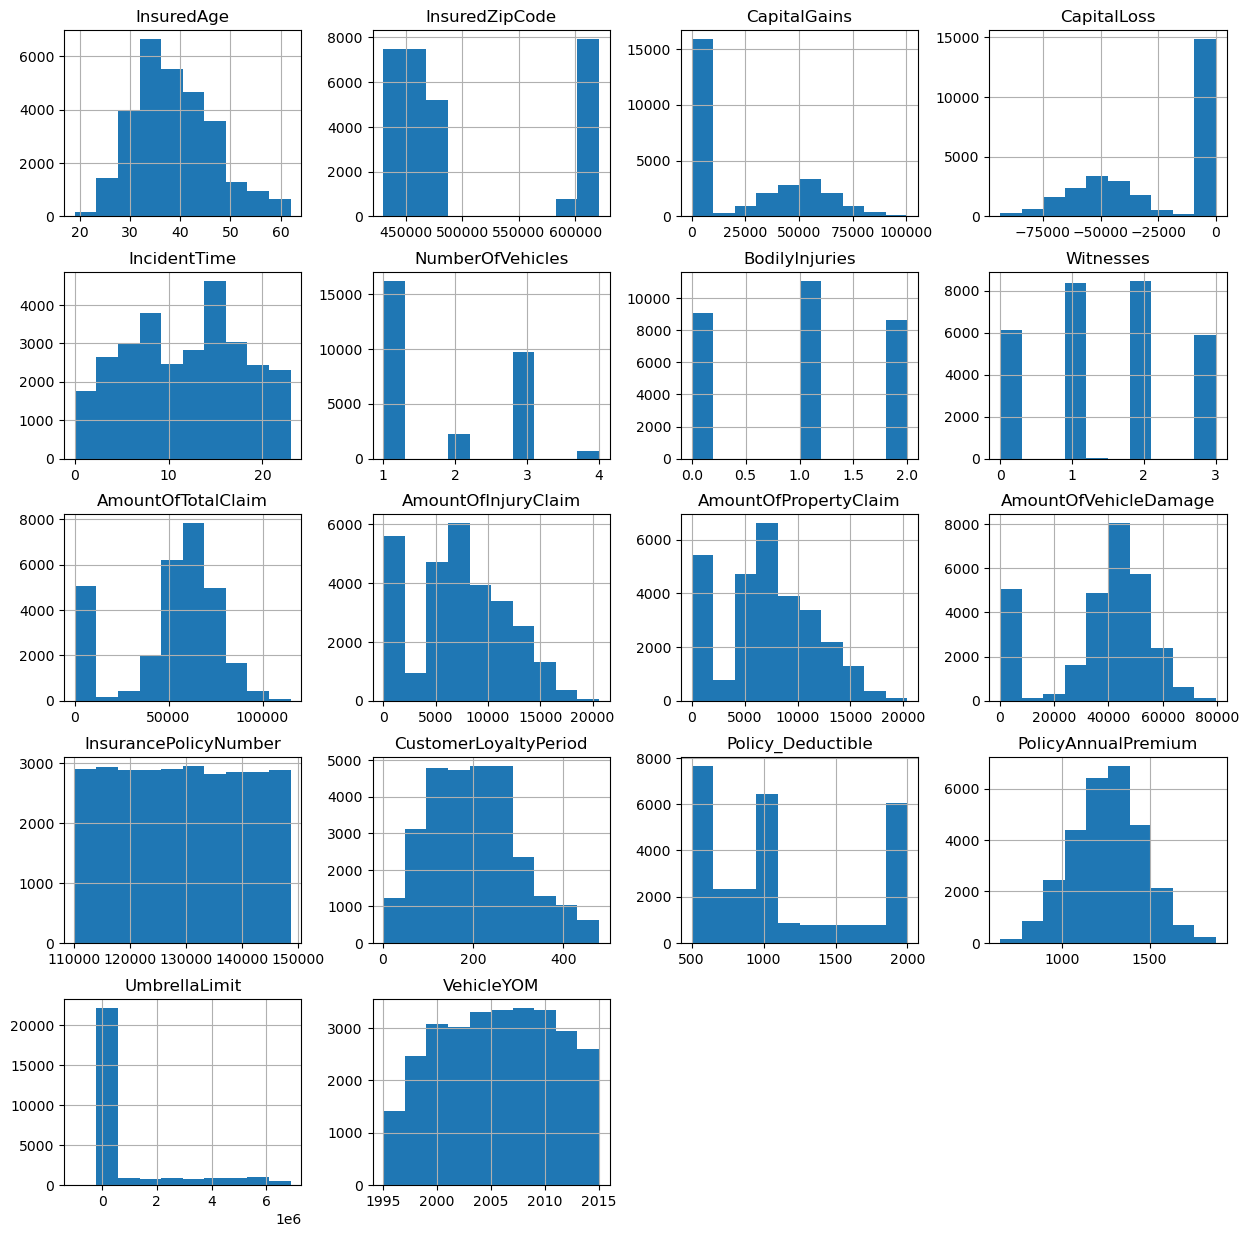

In [105]:
rcParams['figure.figsize'] = 15,15
train_df[quantitative_test].hist()

array([[<AxesSubplot:title={'center':'InsuredAge'}>,
        <AxesSubplot:title={'center':'InsuredZipCode'}>,
        <AxesSubplot:title={'center':'CapitalGains'}>,
        <AxesSubplot:title={'center':'CapitalLoss'}>],
       [<AxesSubplot:title={'center':'IncidentTime'}>,
        <AxesSubplot:title={'center':'NumberOfVehicles'}>,
        <AxesSubplot:title={'center':'BodilyInjuries'}>,
        <AxesSubplot:title={'center':'Witnesses'}>],
       [<AxesSubplot:title={'center':'AmountOfTotalClaim'}>,
        <AxesSubplot:title={'center':'AmountOfInjuryClaim'}>,
        <AxesSubplot:title={'center':'AmountOfPropertyClaim'}>,
        <AxesSubplot:title={'center':'AmountOfVehicleDamage'}>],
       [<AxesSubplot:title={'center':'InsurancePolicyNumber'}>,
        <AxesSubplot:title={'center':'CustomerLoyaltyPeriod'}>,
        <AxesSubplot:title={'center':'Policy_Deductible'}>,
        <AxesSubplot:title={'center':'PolicyAnnualPremium'}>],
       [<AxesSubplot:title={'center':'UmbrellaLimit'}

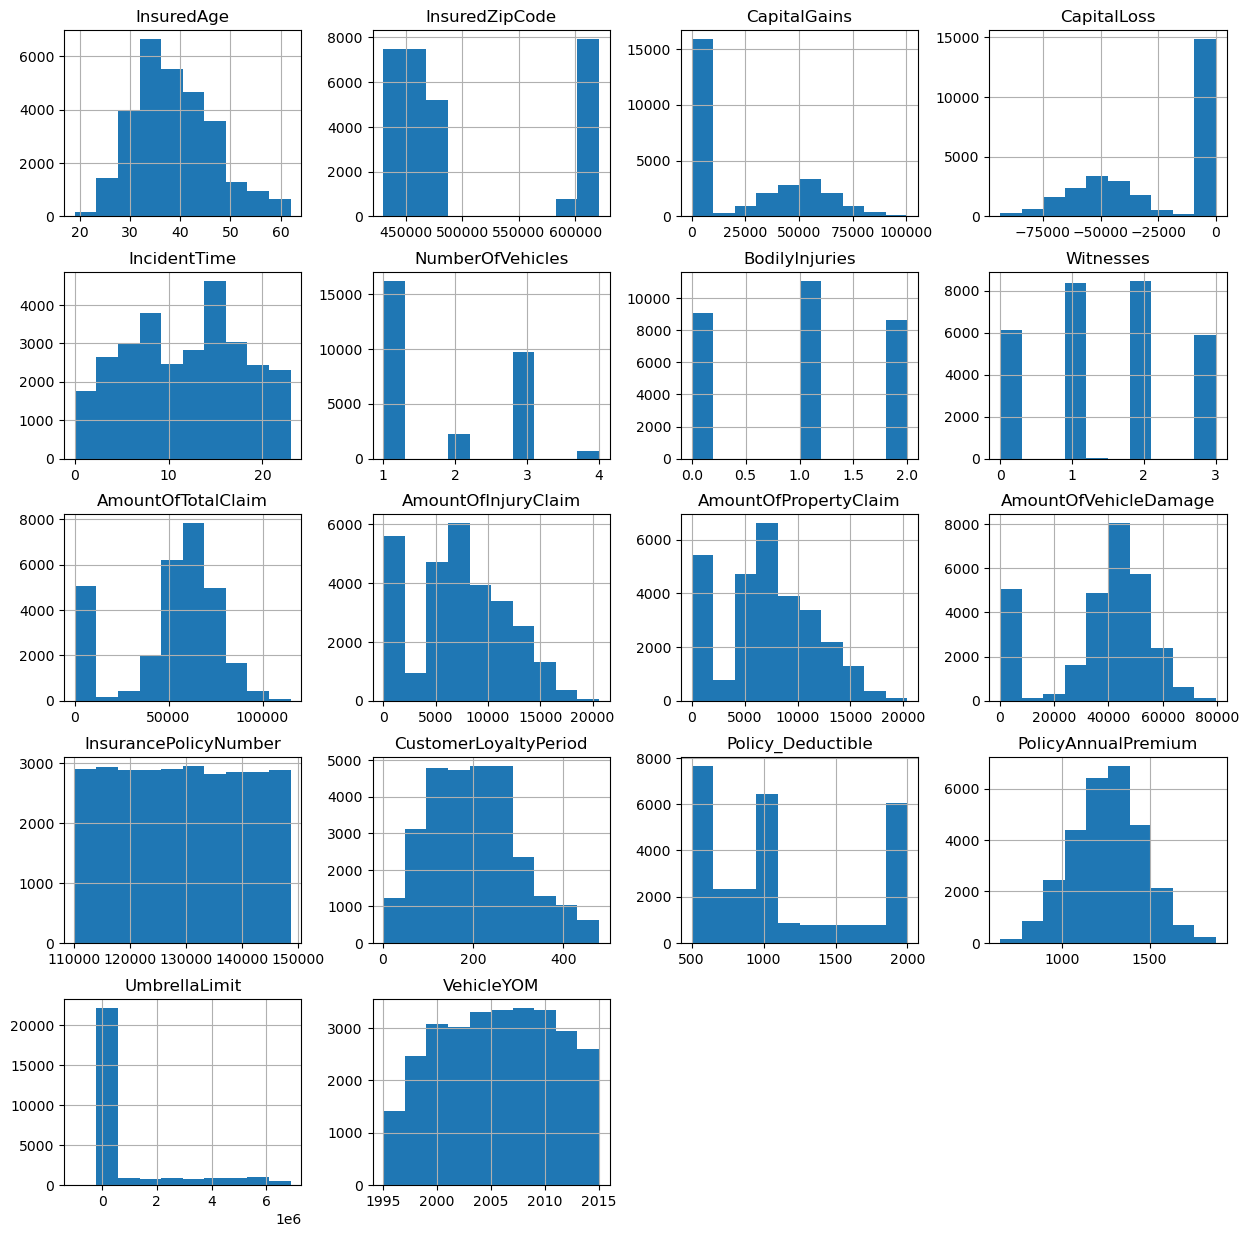

In [106]:
rcParams['figure.figsize'] = 15,15
train_df[quantitative_train].hist()

<AxesSubplot:xlabel='count', ylabel='VehicleModel'>

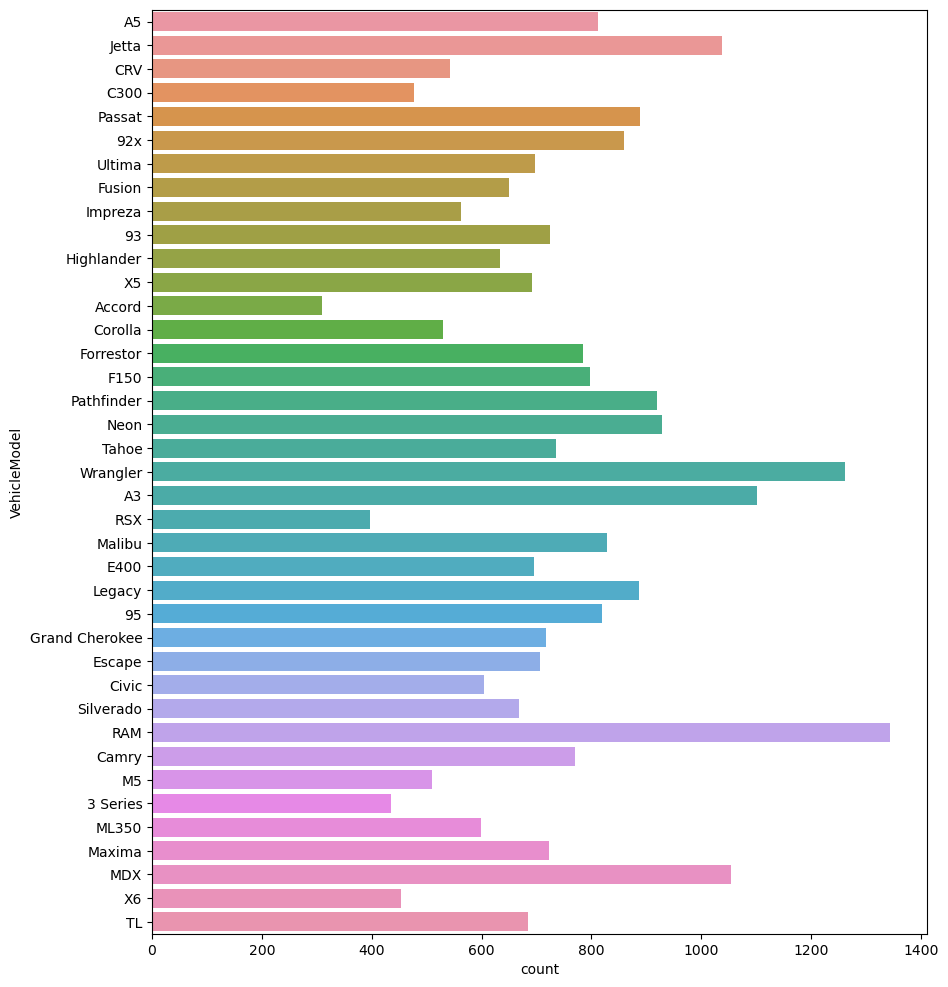

In [107]:
rcParams['figure.figsize'] = 10,12
sns.countplot(y=train_df['VehicleModel'])

<AxesSubplot:xlabel='InsuredRelationship', ylabel='count'>

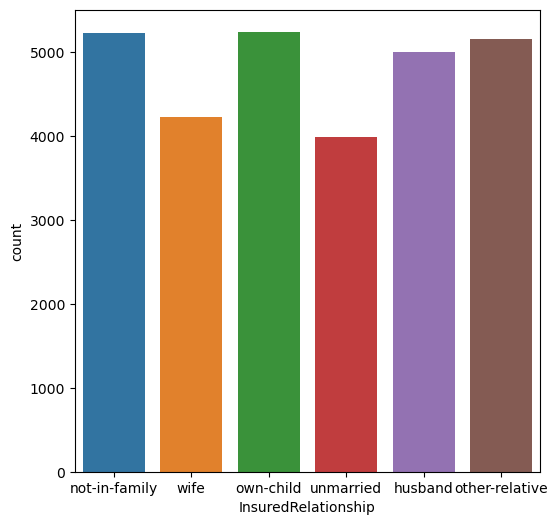

In [108]:
rcParams['figure.figsize'] = 6,6
sns.countplot(x=train_df['InsuredRelationship'])

In [110]:
train_df.corr()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
InsuredAge,1.000000,0.041190,-0.011425,0.016046,0.114015,0.021398,-0.028525,0.058592,0.071543,0.085000,0.080916,0.060644,0.000159,0.929932,0.053875,0.042144,-0.010256,-0.001007
InsuredZipCode,0.041190,1.000000,-0.013577,0.028623,0.005963,0.015182,0.016280,0.008514,-0.021477,-0.014184,-0.005486,-0.025969,-0.012991,0.040450,0.005297,0.033030,0.016940,-0.016233
CapitalGains,-0.011425,-0.013577,1.000000,-0.046165,-0.012516,0.057967,0.055576,-0.017095,0.012440,0.009348,0.003176,0.014067,0.002451,0.002118,0.019947,-0.004706,-0.032753,0.027880
CapitalLoss,0.016046,0.028623,-0.046165,1.000000,-0.019990,0.001129,-0.025576,-0.036999,-0.012711,-0.025865,-0.016586,-0.007428,0.011799,0.022372,-0.032749,0.014637,-0.008670,-0.066514
IncidentTime,0.114015,0.005963,-0.012516,-0.019990,1.000000,0.175025,-0.043883,0.008997,0.273403,0.228780,0.218903,0.272916,-0.008714,0.094481,0.083012,-0.002887,-0.019515,0.041377
NumberOfVehicles,0.021398,0.015182,0.057967,0.001129,0.175025,1.000000,0.019637,-0.015830,0.291093,0.255084,0.236903,0.287740,-0.028060,0.015138,0.042381,-0.060225,-0.029511,0.044938
BodilyInjuries,-0.028525,0.016280,0.055576,-0.025576,-0.043883,0.019637,1.000000,-0.025720,0.030865,0.033482,0.028398,0.026664,-0.023945,-0.021662,-0.031498,-0.002656,0.069743,-0.017675
Witnesses,0.058592,0.008514,-0.017095,-0.036999,0.008997,-0.015830,-0.025720,1.000000,-0.009433,-0.023958,0.054739,-0.019410,-0.028904,0.066648,0.084685,0.009119,-0.002888,0.065233
AmountOfTotalClaim,0.071543,-0.021477,0.012440,-0.012711,0.273403,0.291093,0.030865,-0.009433,1.000000,0.831038,0.840403,0.985600,-0.103429,0.065339,0.027186,-0.011314,-0.037839,-0.032560
AmountOfInjuryClaim,0.085000,-0.014184,0.009348,-0.025865,0.228780,0.255084,0.033482,-0.023958,0.831038,1.000000,0.626832,0.763762,-0.055389,0.073903,0.039356,-0.022061,-0.044236,-0.024365


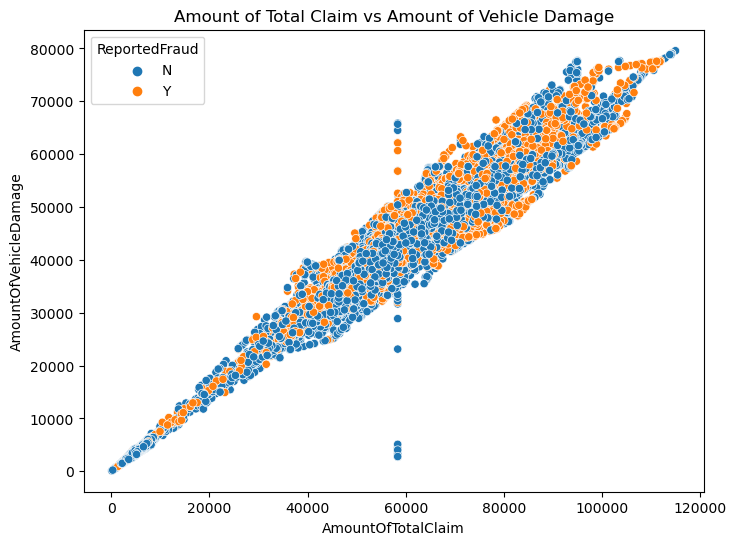

In [114]:
#Pairwise Scatter Plots:
#Pairwise scatter plots can be used to visualize the pairwise relationships between two variables. This can be useful to quickly identify any potential correlations or patterns between variables.

plt.figure(figsize=(8,6))
sns.scatterplot(x='AmountOfTotalClaim', y='AmountOfVehicleDamage', hue='ReportedFraud', data=train_df)
plt.title('Amount of Total Claim vs Amount of Vehicle Damage')
plt.show()

<AxesSubplot:>

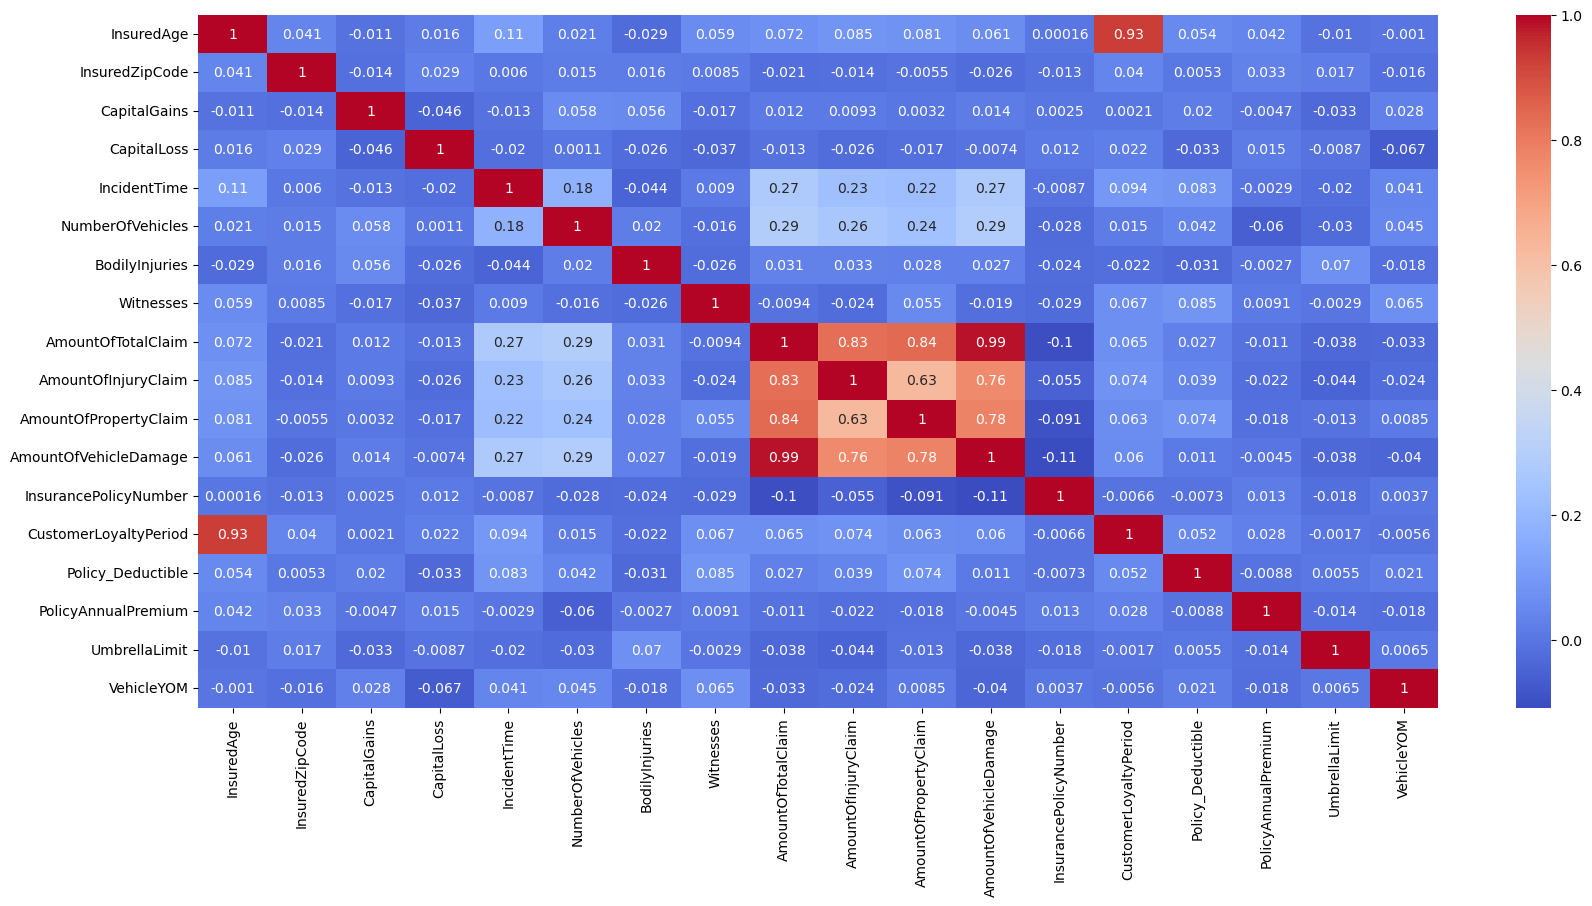

In [111]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)
sns.heatmap(train_df.corr(),annot=True)

<AxesSubplot:xlabel='InsuredGender', ylabel='Count'>

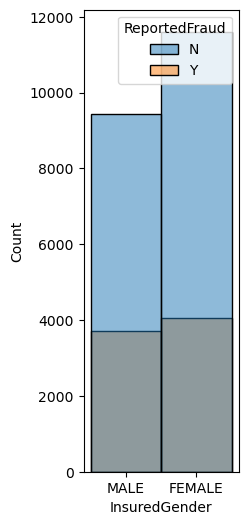

In [112]:
#Countplot of Frauds and not frauds in train data
fig = plt.figure(figsize=(2,6))
sns.histplot(data=train_df,x="InsuredGender", hue= 'ReportedFraud')

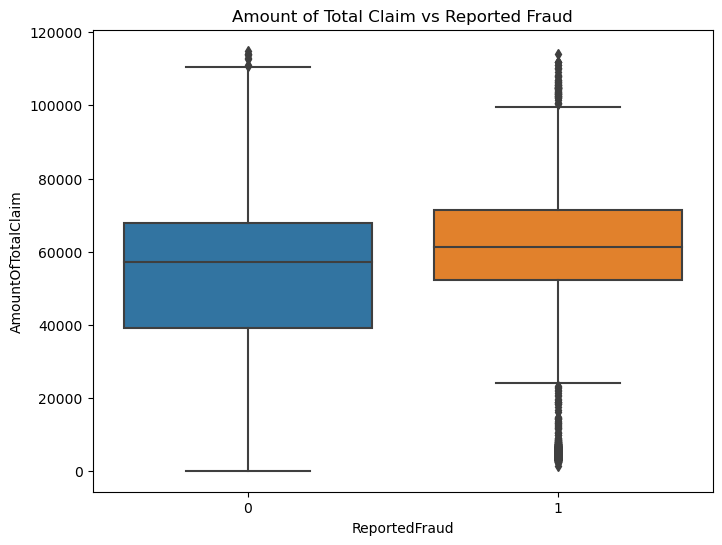

In [113]:
#BoxPlot to check the outliers present in the train data
plt.figure(figsize=(8,6))
sns.boxplot(x='ReportedFraud', y='AmountOfTotalClaim', data=trained_df)
plt.title('Amount of Total Claim vs Reported Fraud')
plt.show()


<AxesSubplot:xlabel='AmountOfTotalClaim', ylabel='Count'>

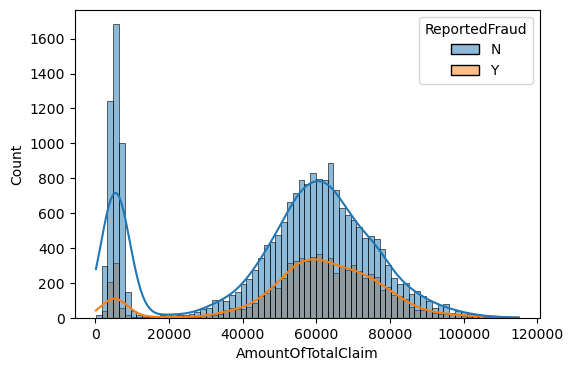

In [115]:
# Create a histogram of AmountOfTotalClaim
sns.histplot(x='AmountOfTotalClaim', data=train_df, hue='ReportedFraud', kde=True)